### ReadMe
This project, sourced from CODEBASIC, involves presenting data insights to the marketing team within the Food & Beverage industry, aiming to provide valuable information to support marketing strategies and decision-making.

Link - https://codebasics.io/challenge/codebasics-resume-project-challenge

# Problem Statements 1

# 1. Demographic Insights
#### a. Who prefers energy drink more? (male/female/non-binary?)
#### b. Which age group prefers energy drinks more?
#### c. Which type of marketing reaches the most Youth (15-30)?
# 2. Consumer Preferences:
#### a. What are the preferred ingredients of energy drinks among respondents?
#### b. What packaging preferences do respondents have for energy drinks?
# 3. Competition Analysis:
#### a. Who are the current market leaders?
#### b. What are the primary reasons consumers prefer those brands over ours?
# 4. Marketing Channels and Brand Awareness:
#### a. Which marketing channel can be used to reach more customers?
#### b. How effective are different marketing strategies and channels in reaching our customers?
# 5. Brand Penetration:
#### a. What do people think about our brand? (overall rating)
#### b. Which cities do we need to focus more on?
# 6. Purchase Behavior:
#### a. Where do respondents prefer to purchase energy drinks?
#### b. What are the typical consumption situations for energy drinks among respondents?
#### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?
# 7. Product Development
#### a. Which area of business should we focus more on our product development? (Branding/taste/availability)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 =pd.read_csv("dim_cities.csv")
df2 =pd.read_csv("dim_repondents.csv")
df3 =pd.read_csv("fact_survey_responses.csv")

In [3]:
df1

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [4]:
df2

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120
...,...,...,...,...,...
9995,130026,Arnav Kale,31-45,Male,CT112
9996,130027,Yuvraj Agrawal,15-18,Male,CT113
9997,130028,Vardaniya Chauhan,31-45,Male,CT114
9998,130029,Jayan Goyal,19-30,Male,CT113


In [5]:
df3

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


In [6]:
df1.columns

Index(['City_ID', 'City', 'Tier'], dtype='object')

In [7]:
df2.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID'], dtype='object')

In [8]:
df3.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [9]:
# Merge df1, df2, and df3 based on the matching column 'City_ID' and 'Respondent_ID'
df = pd.merge(df1, df2, on='City_ID')
df = pd.merge(df, df3, on='Respondent_ID')

# Print the merged dataframe
df


,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,Healthier alternatives,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,Reduced sugar content,Sugar,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,Other,Sugar,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CT120,Lucknow,Tier 2,129719,Aaryahi Wason,19-30,Female,112689,Once a week,Before exercise,...,Reduced sugar content,Caffeine,Yes,No,TV commercials,Innovative bottle design,Not Sure,50-99,Supermarkets,Studying/working late
9996,CT120,Lucknow,Tier 2,129777,Ryan Kothari,15-18,Male,112747,Once a week,Throughout the day,...,Reduced sugar content,Sugar,Yes,Yes,Other,Compact and portable cans,No,50-99,Supermarkets,Studying/working late
9997,CT120,Lucknow,Tier 2,129814,Sara Kothari,19-30,Male,112784,Daily,Before exercise,...,Other,Vitamins,Yes,No,TV commercials,Compact and portable cans,No,50-99,Supermarkets,Other
9998,CT120,Lucknow,Tier 2,129829,Shamik Deep,19-30,Female,112799,Rarely,To stay awake during work/study,...,Wider range of flavors,Caffeine,No,Not Sure,Online ads,Innovative bottle design,No,Above 150,Supermarkets,Studying/working late


In [10]:
df.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

## 1. Demographic Insights
#### a. Who prefers energy drink more? (male/female/non-binary?)
##### b. Which age group prefers energy drinks more?
##### c. Which type of marketing reaches the most Youth (15-30)?

###  a. Who prefers energy drink more? (male/female/non-binary?)

In [11]:
df.Current_brands.unique()

array(['Blue Bull', 'Others', 'Gangster', 'Cola-Coka', 'Sky 9', 'CodeX',
       'Bepsi'], dtype=object)

In [12]:
df.Gender.unique()

array(['Non-binary', 'Female', 'Male'], dtype=object)

In [21]:
table = pd.crosstab(df['Gender'], df['Current_brands'], margins=True, margins_name='Total')

# Print the table
table

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Gender,,,,,,,,
Female,783,403,352,809,613,163,332,3455
Male,1208,603,590,1604,1154,291,588,6038
Non-binary,121,52,38,125,87,25,59,507
Total,2112,1058,980,2538,1854,479,979,10000


In [22]:
# Assuming the merged dataframe is named 'df'
table = pd.crosstab(df['Gender'], df['Current_brands'], margins=True, margins_name='Total')

# Apply background gradient to highlight top count
highlighted_table = table.style.background_gradient(cmap='Blues')

# Display the highlighted table
display(highlighted_table)

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Gender,,,,,,,,
Female,783,403,352,809,613,163,332,3455
Male,1208,603,590,1604,1154,291,588,6038
Non-binary,121,52,38,125,87,25,59,507
Total,2112,1058,980,2538,1854,479,979,10000


In [15]:
import pandas as pd

# Assuming the merged dataframe is named 'df'
table = pd.crosstab(df['Gender'], df['Current_brands'])

# Apply highlighting to the maximum count
highlighted_table = table.style.highlight_max(color='yellow')

# Display the highlighted table
display(highlighted_table)


Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Gender,,,,,,,
Female,783,403,352,809,613,163,332
Male,1208,603,590,1604,1154,291,588
Non-binary,121,52,38,125,87,25,59


In [16]:

# Assuming the merged dataframe is named 'df'
table = pd.crosstab(df['Gender'], df['Current_brands'])

# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = table.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)


Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Gender,,,,,,,
Female,783,403,352,809,613,163,332
Male,1208,603,590,1604,1154,291,588
Non-binary,121,52,38,125,87,25,59


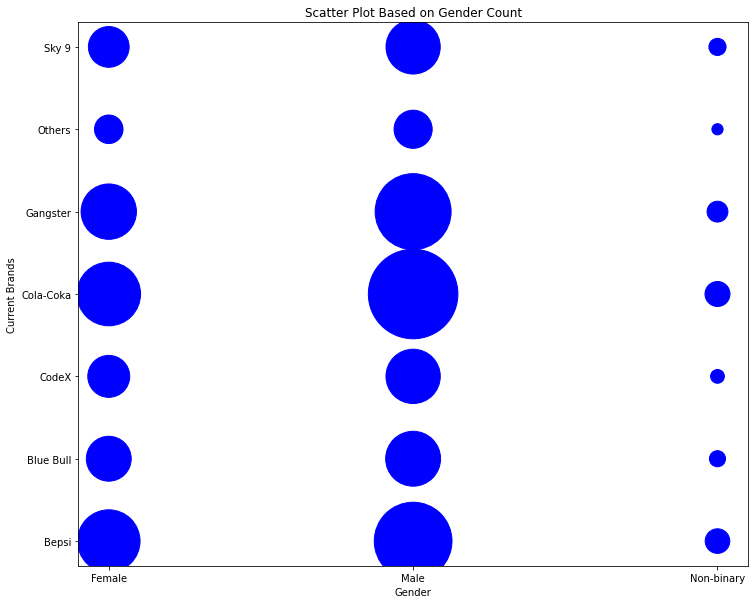

In [17]:
# Group by 'Current_brands' and 'Gender' and count the occurrences
grouped_df = df.groupby(['Current_brands', 'Gender']).size().reset_index(name='Count')

# Increase the figure size
plt.figure(figsize=(12, 10))

# Create a scatter plot
plt.scatter(grouped_df['Gender'], grouped_df['Current_brands'], s=grouped_df['Count']*5, color='blue')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Current Brands')
plt.title('Scatter Plot Based on Gender Count')

# Display the scatter plot
plt.show()


### b. Which age group prefers energy drinks more?

In [23]:
df.Current_brands.unique()

array(['Blue Bull', 'Others', 'Gangster', 'Cola-Coka', 'Sky 9', 'CodeX',
       'Bepsi'], dtype=object)

In [24]:
df.Age.unique()

array(['31-45', '19-30', '65+', '46-65', '15-18'], dtype=object)

In [25]:
Age_Current_brand_Table = pd.crosstab(df['Age'], df['Current_brands'], margins=True, margins_name='Total')
Age_Current_brand_Table

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Age,,,,,,,,
15-18,278,203,135,313,337,71,151,1488
19-30,1192,547,540,1450,983,272,536,5520
31-45,521,252,242,615,419,105,222,2376
46-65,87,41,37,114,84,23,40,426
65+,34,15,26,46,31,8,30,190
Total,2112,1058,980,2538,1854,479,979,10000


In [26]:
Age_Current_brand_Table = pd.crosstab(df['Age'], df['Current_brands'])

# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = Age_Current_brand_Table.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Age,,,,,,,
15-18,278,203,135,313,337,71,151
19-30,1192,547,540,1450,983,272,536
31-45,521,252,242,615,419,105,222
46-65,87,41,37,114,84,23,40
65+,34,15,26,46,31,8,30


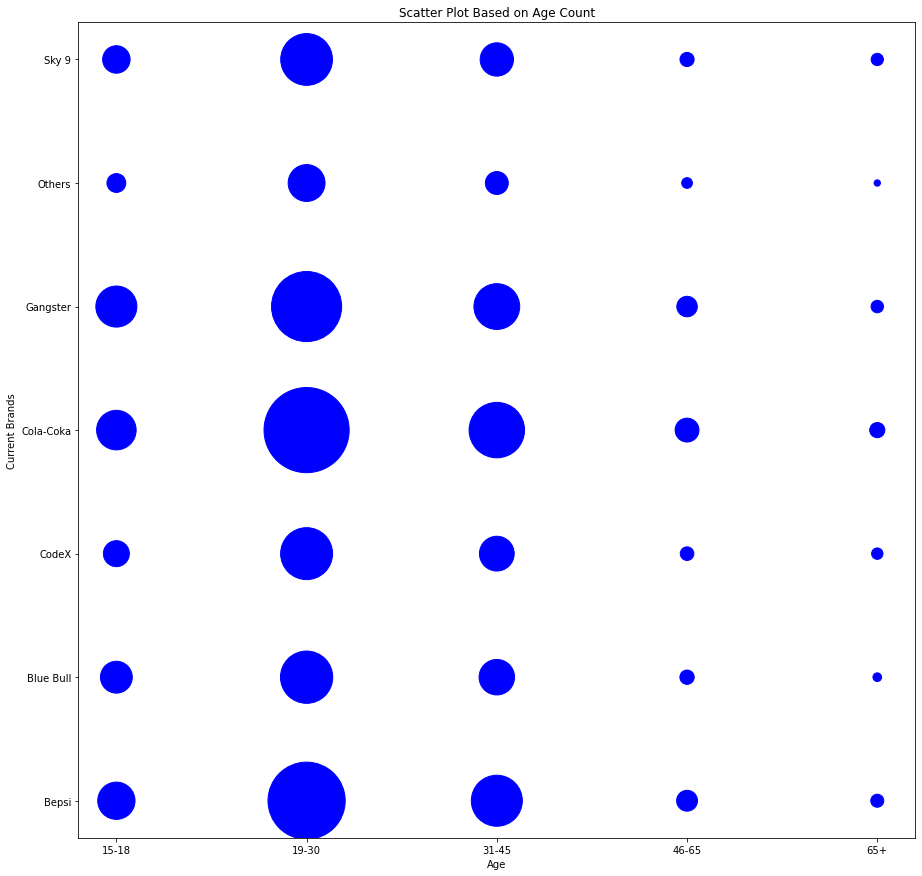

In [28]:
# Group by 'Current_brands' and 'Gender' and count the occurrences
grouped_df = df.groupby(['Age','Current_brands']).size().reset_index(name='Count')

# Increase the figure size
plt.figure(figsize=(15, 15))

# Create a scatter plot
plt.scatter(grouped_df['Age'], grouped_df['Current_brands'], s=grouped_df['Count']*5, color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Current Brands')
plt.title('Scatter Plot Based on Age Count')

# Display the scatter plot
plt.show()


### c. Which type of marketing reaches the most Youth (15-30)?

In [29]:
df

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,Healthier alternatives,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,Reduced sugar content,Sugar,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,Other,Sugar,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CT120,Lucknow,Tier 2,129719,Aaryahi Wason,19-30,Female,112689,Once a week,Before exercise,...,Reduced sugar content,Caffeine,Yes,No,TV commercials,Innovative bottle design,Not Sure,50-99,Supermarkets,Studying/working late
9996,CT120,Lucknow,Tier 2,129777,Ryan Kothari,15-18,Male,112747,Once a week,Throughout the day,...,Reduced sugar content,Sugar,Yes,Yes,Other,Compact and portable cans,No,50-99,Supermarkets,Studying/working late
9997,CT120,Lucknow,Tier 2,129814,Sara Kothari,19-30,Male,112784,Daily,Before exercise,...,Other,Vitamins,Yes,No,TV commercials,Compact and portable cans,No,50-99,Supermarkets,Other
9998,CT120,Lucknow,Tier 2,129829,Shamik Deep,19-30,Female,112799,Rarely,To stay awake during work/study,...,Wider range of flavors,Caffeine,No,Not Sure,Online ads,Innovative bottle design,No,Above 150,Supermarkets,Studying/working late


In [30]:
df.Age.unique()

array(['31-45', '19-30', '65+', '46-65', '15-18'], dtype=object)

In [31]:
df.Marketing_channels.unique()

array(['TV commercials', 'Other', 'Online ads', 'Outdoor billboards',
       'Print media'], dtype=object)

In [32]:
# Filter the DataFrame for the age group 15-30
age_group_15_30 = df[df['Age'].isin(['19-30', '15-18'])]

# Get the unique marketing channels for the age group 15-30
marketing_channels_reached = age_group_15_30['Marketing_channels'].unique()

# Print the unique marketing channels
print(marketing_channels_reached)

['TV commercials' 'Other' 'Online ads' 'Print media' 'Outdoor billboards']


In [34]:
# Filter the DataFrame for the age group 15-30
age_group_15_30 = df[df['Age'].isin(['19-30', '15-18'])]

# Create a cross-tabulation table of 'Age' and 'Marketing_channels'
cross_table = pd.crosstab(age_group_15_30['Age'], age_group_15_30['Marketing_channels'], margins=True, margins_name='Total')

# Print the cross-tabulation table
cross_table

Marketing_channels,Online ads,Other,Outdoor billboards,Print media,TV commercials,Total
Age,,,,,,
15-18,707,94,117,75,495,1488
19-30,2666,608,585,371,1290,5520
Total,3373,702,702,446,1785,7008


# 2. Consumer Preferences:
#### a. What are the preferred ingredients of energy drinks among respondents?
#### b. What packaging preferences do respondents have for energy drinks?

### a. What are the preferred ingredients of energy drinks among respondents?

In [37]:
df

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,Healthier alternatives,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,Reduced sugar content,Sugar,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,Other,Sugar,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CT120,Lucknow,Tier 2,129719,Aaryahi Wason,19-30,Female,112689,Once a week,Before exercise,...,Reduced sugar content,Caffeine,Yes,No,TV commercials,Innovative bottle design,Not Sure,50-99,Supermarkets,Studying/working late
9996,CT120,Lucknow,Tier 2,129777,Ryan Kothari,15-18,Male,112747,Once a week,Throughout the day,...,Reduced sugar content,Sugar,Yes,Yes,Other,Compact and portable cans,No,50-99,Supermarkets,Studying/working late
9997,CT120,Lucknow,Tier 2,129814,Sara Kothari,19-30,Male,112784,Daily,Before exercise,...,Other,Vitamins,Yes,No,TV commercials,Compact and portable cans,No,50-99,Supermarkets,Other
9998,CT120,Lucknow,Tier 2,129829,Shamik Deep,19-30,Female,112799,Rarely,To stay awake during work/study,...,Wider range of flavors,Caffeine,No,Not Sure,Online ads,Innovative bottle design,No,Above 150,Supermarkets,Studying/working late


In [38]:
df.Ingredients_expected.unique()

array(['Caffeine', 'Guarana', 'Vitamins', 'Sugar'], dtype=object)

In [39]:
df.Respondent_ID.unique()

array([120094, 120120, 120162, ..., 129814, 129829, 130001], dtype=int64)

In [40]:
# Count the number of unique values in the 'Respondent_ID' column
unique_count = df['Respondent_ID'].nunique()

# Print the count
print(unique_count)

10000


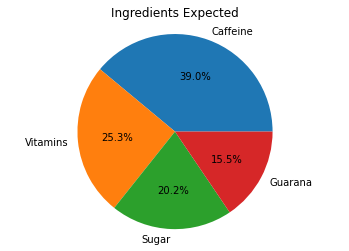

In [41]:
# Count the unique values in the 'Ingredients_expected' column
ingredient_counts = df['Ingredients_expected'].value_counts()

# Create a pie chart
plt.pie(ingredient_counts, labels=ingredient_counts.index, autopct='%1.1f%%')

# Set the aspect ratio to be equal so that the pie is circular
plt.axis('equal')

# Add a title to the pie chart
plt.title("Ingredients Expected")

# Display the pie chart
plt.show()

In [45]:
ingredient_counts = df['Ingredients_expected'].value_counts()
ingredient_counts

Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: Ingredients_expected, dtype: int64

### b. What packaging preferences do respondents have for energy drinks?

In [46]:
df.Packaging_preference.unique()

array(['Compact and portable cans', 'Other', 'Collectible packaging',
       'Innovative bottle design', 'Eco-friendly design'], dtype=object)

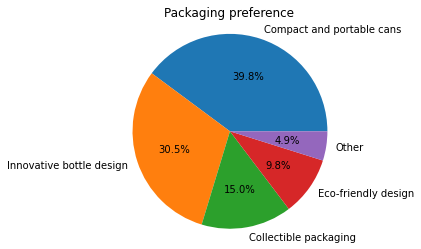

In [49]:
# Count the unique values in the 'Ingredients_expected' column
Packaging_preference_counts = df['Packaging_preference'].value_counts()

# Create a pie chart
plt.pie(Packaging_preference_counts, labels=Packaging_preference_counts.index, autopct='%1.1f%%')

# Set the aspect ratio to be equal so that the pie is circular
plt.axis('equal')

# Add a title to the pie chart
plt.title("Packaging preference")

# Display the pie chart
plt.show()

# 3. Competition Analysis:
### a. Who are the current market leaders?
### b. What are the primary reasons consumers prefer those brands over ours?

#### a. Who are the current market leaders?

In [51]:
df.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [52]:
market_leader_based_on_count = df['Current_brands'].value_counts()
market_leader_based_on_count

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64

#### here cola-coka is current market leader baseded on count of Respondent

## b. What are the primary reasons consumers prefer those brands over ours?

In [54]:
df.Current_brands.unique()

array(['Blue Bull', 'Others', 'Gangster', 'Cola-Coka', 'Sky 9', 'CodeX',
       'Bepsi'], dtype=object)

In [55]:
df.Taste_experience.unique()

array([2, 5, 1, 3, 4], dtype=int64)

In [56]:
market_leader_based_on_BrandVsTaste = pd.crosstab(df['Taste_experience'], df['Current_brands'], margins=True, margins_name='Total')
market_leader_based_on_BrandVsTaste

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Taste_experience,,,,,,,,
1,217,104,107,270,223,41,92,1054
2,351,163,148,362,268,69,163,1524
3,602,319,286,756,558,159,277,2957
4,517,258,248,632,452,114,258,2479
5,425,214,191,518,353,96,189,1986
Total,2112,1058,980,2538,1854,479,979,10000


In [57]:
market_leader_based_on_BrandVsTaste = pd.crosstab(df['Taste_experience'], df['Current_brands'])

# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = market_leader_based_on_BrandVsTaste.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Taste_experience,,,,,,,
1,217,104,107,270,223,41,92
2,351,163,148,362,268,69,163
3,602,319,286,756,558,159,277
4,517,258,248,632,452,114,258
5,425,214,191,518,353,96,189


In [58]:
df.Reasons_for_choosing_brands.unique()

array(['Brand reputation', 'Availability', 'Effectiveness',
       'Taste/flavor preference', 'Other'], dtype=object)

In [59]:
market_leader_based_on_BrandVsReasons_for_choosing = pd.crosstab(df['Reasons_for_choosing_brands'], df['Current_brands'])

# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = market_leader_based_on_BrandVsReasons_for_choosing.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Reasons_for_choosing_brands,,,,,,,
Availability,418,180,195,510,339,86,182
Brand reputation,577,289,259,616,511,140,260
Effectiveness,339,187,176,433,338,87,188
Other,355,165,168,448,309,79,155
Taste/flavor preference,423,237,182,531,357,87,194


In [60]:
df.Consume_frequency.unique()

array(['2-3 times a month', '2-3 times a week', 'Rarely', 'Daily',
       'Once a week'], dtype=object)

In [61]:
market_leader_based_on_BrandVsConsume_frequency = pd.crosstab(df['Consume_frequency'], df['Current_brands'])

# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = market_leader_based_on_BrandVsConsume_frequency.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Consume_frequency,,,,,,,
2-3 times a month,326,179,147,435,307,63,156
2-3 times a week,744,375,361,858,646,174,333
Daily,272,147,123,323,271,73,137
Once a week,358,165,145,423,291,72,155
Rarely,412,192,204,499,339,97,198


In [62]:
Health_concerns_Vs_Improvements_desired= pd.crosstab(df['Health_concerns'], df['Improvements_desired'], margins=True, margins_name='Total')
Health_concerns_Vs_Improvements_desired

Improvements_desired,Healthier alternatives,More natural ingredients,Other,Reduced sugar content,Wider range of flavors,Total
Health_concerns,,,,,,
No,564,1007,410,1169,805,3955
Yes,908,1491,588,1826,1232,6045
Total,1472,2498,998,2995,2037,10000


In [63]:
Health_concerns_Vs_Current_brands= pd.crosstab(df['Health_concerns'], df['Current_brands'], margins=True, margins_name='Total')
Health_concerns_Vs_Current_brands

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Health_concerns,,,,,,,,
No,824,457,383,994,742,169,386,3955
Yes,1288,601,597,1544,1112,310,593,6045
Total,2112,1058,980,2538,1854,479,979,10000


In [68]:
# Assuming you have already created the crosstab table and named it 'Health_concerns_Vs_Current_brands'

# Convert the table values to percentages
percentage_table = Health_concerns_Vs_Current_brands.apply(lambda x: x / x.loc['Total'], axis=1) * 100

# Print the table with values converted to percentages
percentage_table


Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Health_concerns,,,,,,,,
No,20.834387,11.554994,9.683944,25.132743,18.761062,4.273072,9.759798,100.0
Yes,21.306865,9.942101,9.875931,25.541770,18.395368,5.128205,9.809760,100.0
Total,21.120000,10.580000,9.800000,25.380000,18.540000,4.790000,9.790000,100.0


In [65]:
df.head()

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,Healthier alternatives,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,Reduced sugar content,Sugar,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,Other,Sugar,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties


# 4. Marketing Channels and Brand Awareness:
#### a. Which marketing channel can be used to reach more customers?
#### b. How effective are different marketing strategies and channels in reaching our customers?

### a. Which marketing channel can be used to reach more customers?

In [70]:
df.Marketing_channels.unique()

array(['TV commercials', 'Other', 'Online ads', 'Outdoor billboards',
       'Print media'], dtype=object)

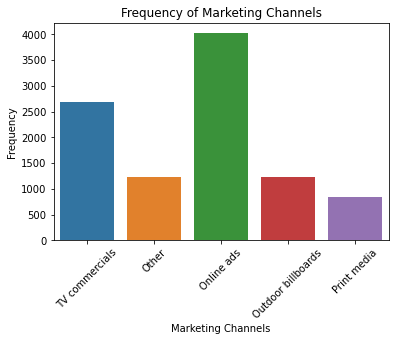

In [71]:
# Create a countplot of 'Marketing_channels'
sns.countplot(data=df, x='Marketing_channels')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Marketing Channels')
plt.ylabel('Frequency')
plt.title('Frequency of Marketing Channels')

# Display the plot
plt.show()


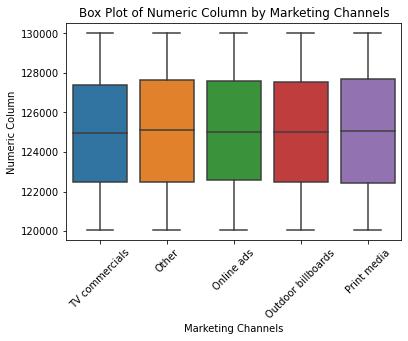

In [73]:
# Create a box plot of 'Marketing_channels'
sns.boxplot(data=df, x='Marketing_channels', y='Respondent_ID')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Marketing Channels')
plt.ylabel('Numeric Column')
plt.title('Box Plot of Numeric Column by Marketing Channels')

# Display the plot
plt.show()


In [75]:
df.Tier.unique()

array(['Tier 1', 'Tier 2'], dtype=object)

In [76]:
#spliting Tier column into Tier and Tier_unit
df[['Tier_unit', 'Tier_Name']] = df['Tier'].str.split(' ', expand = True)

In [77]:
df

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Tier_unit,Tier_Name
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise,Tier,1
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties,Tier,1
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise,Tier,1
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties,Tier,1
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties,Tier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CT120,Lucknow,Tier 2,129719,Aaryahi Wason,19-30,Female,112689,Once a week,Before exercise,...,Yes,No,TV commercials,Innovative bottle design,Not Sure,50-99,Supermarkets,Studying/working late,Tier,2
9996,CT120,Lucknow,Tier 2,129777,Ryan Kothari,15-18,Male,112747,Once a week,Throughout the day,...,Yes,Yes,Other,Compact and portable cans,No,50-99,Supermarkets,Studying/working late,Tier,2
9997,CT120,Lucknow,Tier 2,129814,Sara Kothari,19-30,Male,112784,Daily,Before exercise,...,Yes,No,TV commercials,Compact and portable cans,No,50-99,Supermarkets,Other,Tier,2
9998,CT120,Lucknow,Tier 2,129829,Shamik Deep,19-30,Female,112799,Rarely,To stay awake during work/study,...,No,Not Sure,Online ads,Innovative bottle design,No,Above 150,Supermarkets,Studying/working late,Tier,2


### b. How effective are different marketing strategies and channels in reaching our customers?

In [83]:
df.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Tier_unit',
       'Tier_Name'],
      dtype='object')

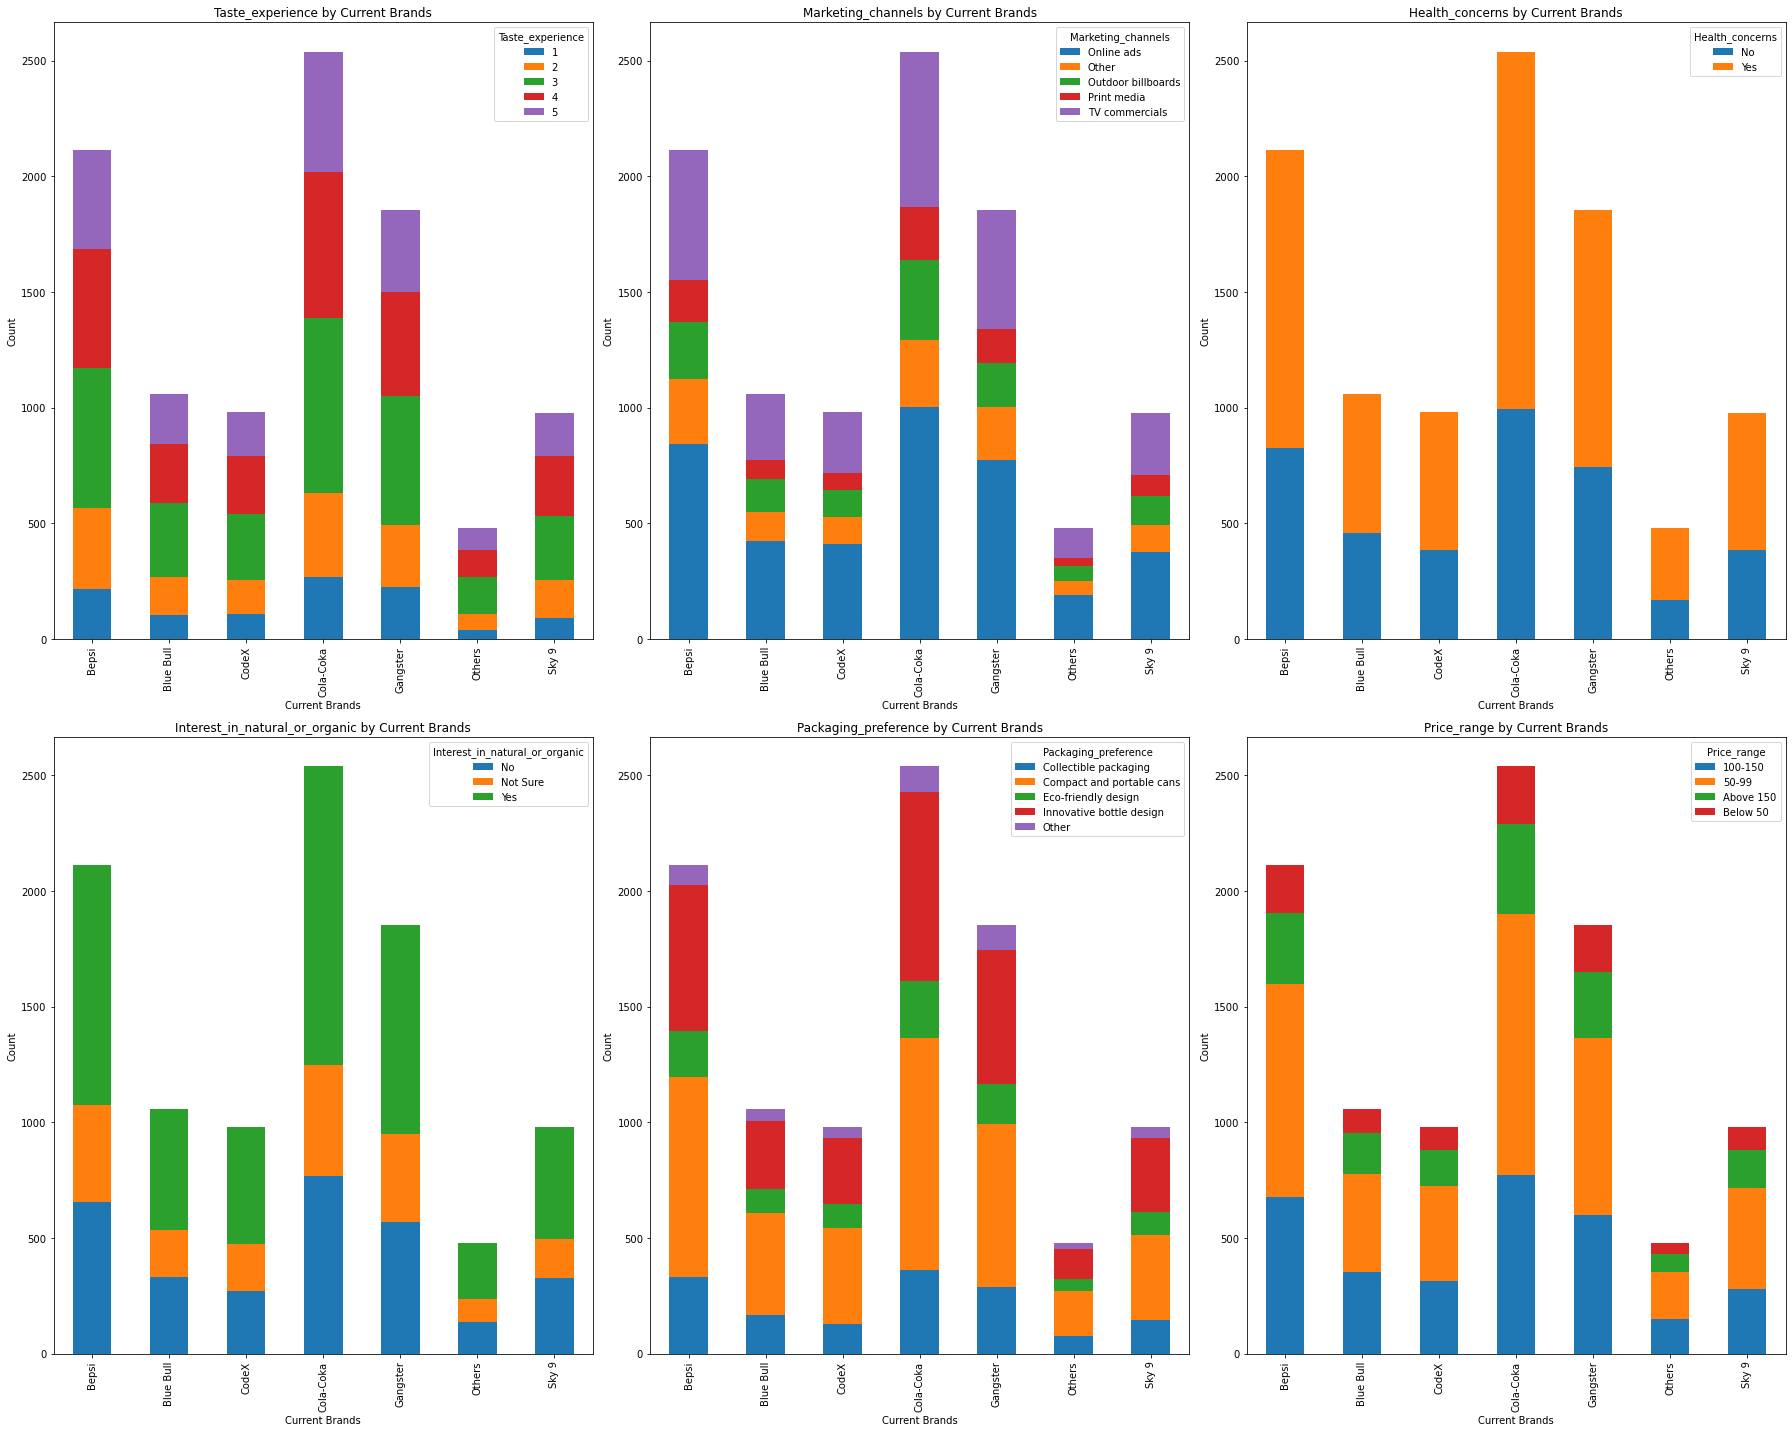

In [87]:
# Select the relevant columns for analysis
columns = ['Current_brands', 'Taste_experience', 'Marketing_channels', 'Health_concerns', 'Interest_in_natural_or_organic', 'Packaging_preference', 'Price_range']
data = df[columns]

# Perform cross-tabulation between Current_brands and other columns
cross_tabs = []
for col in data.columns[1:]:
    cross_tab = pd.crosstab(data['Current_brands'], data[col])
    cross_tabs.append(cross_tab)

# Visualize the cross-tabulation using stacked bar plots
plt.figure(figsize=(25, 20))
for i, cross_tab in enumerate(cross_tabs):
    ax = plt.subplot(2, 3, i+1)
    cross_tab.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel('Current Brands')
    plt.ylabel('Count')
    plt.title(f'{data.columns[i+1]} by Current Brands')
    plt.legend(title=data.columns[i+1], loc='upper right')

plt.tight_layout()
plt.show()


# 5. Brand Penetration:¶
### a. What do people think about our brand? (overall rating)
### b. Which cities do we need to focus more on?

#### b. Which cities do we need to focus more on?

In [89]:
df.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Tier_unit',
       'Tier_Name'],
      dtype='object')

In [90]:
df_CodeX = df[(df['Current_brands'] == 'CodeX')]

In [92]:
df_CodeX

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Tier_unit,Tier_Name
13,CT111,Delhi,Tier 1,120397,Shamik Kumer,15-18,Female,103367,Daily,Before exercise,...,Yes,Yes,TV commercials,Compact and portable cans,Not Sure,100-150,Online retailers,Sports/exercise,Tier,1
25,CT111,Delhi,Tier 1,120786,Krish Keer,46-65,Female,103756,Daily,To stay awake during work/study,...,No,Yes,Outdoor billboards,Collectible packaging,Yes,Below 50,Online retailers,Other,Tier,1
32,CT111,Delhi,Tier 1,120888,Jayesh Khatri,31-45,Male,103858,Rarely,For mental alertness,...,Yes,Not Sure,TV commercials,Compact and portable cans,Yes,100-150,Gyms and fitness centers,Sports/exercise,Tier,1
59,CT111,Delhi,Tier 1,121513,Prisha Halder,19-30,Female,104483,Daily,To stay awake during work/study,...,No,Yes,TV commercials,Innovative bottle design,No,100-150,Local stores,Social outings/parties,Tier,1
60,CT111,Delhi,Tier 1,121519,Tanya Chopra,19-30,Female,104489,Daily,Before exercise,...,No,Yes,Outdoor billboards,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late,Tier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9834,CT120,Lucknow,Tier 2,120555,Hiran Keer,19-30,Female,103525,Rarely,Before exercise,...,Yes,No,TV commercials,Compact and portable cans,Not Sure,50-99,Online retailers,Studying/working late,Tier,2
9849,CT120,Lucknow,Tier 2,121787,Bhamini Shan,19-30,Female,104757,Once a week,Before exercise,...,No,Yes,Online ads,Collectible packaging,No,50-99,Gyms and fitness centers,Sports/exercise,Tier,2
9961,CT120,Lucknow,Tier 2,128056,Biju Buch,31-45,Female,111026,2-3 times a month,Before exercise,...,Yes,Yes,TV commercials,Innovative bottle design,Yes,50-99,Local stores,Studying/working late,Tier,2
9978,CT120,Lucknow,Tier 2,128925,Eva Bhakta,19-30,Male,111895,2-3 times a month,Before exercise,...,Yes,Not Sure,TV commercials,Compact and portable cans,Yes,100-150,Supermarkets,Sports/exercise,Tier,2


In [98]:
df_CodeX.shape

(980, 31)

In [ ]:
# we can see that there are 980 Respondent for CodeX Drink

#### Analysing CodeX brand data only

In [96]:
City_counts = df_CodeX['City'].value_counts()
City_counts

Bangalore    292
Hyderabad    182
Mumbai       156
Chennai       92
Pune          92
Kolkata       48
Ahmedabad     45
Delhi         40
Jaipur        28
Lucknow        5
Name: City, dtype: int64

In [104]:
City_Count_Vs_Current_Brand = pd.crosstab(df_CodeX['City'], df_CodeX['Current_brands'])

# Print the table
City_Count_Vs_Current_Brand

Current_brands,CodeX
City,
Ahmedabad,45
Bangalore,292
Chennai,92
Delhi,40
Hyderabad,182
Jaipur,28
Kolkata,48
Lucknow,5
Mumbai,156


In [101]:
City_Count_Vs_Tier = pd.crosstab(df_CodeX['City'], df_CodeX['Tier'],margins=True, margins_name='Total')

# Print the table
City_Count_Vs_Tier

Tier,Tier 1,Tier 2,Total
City,,,
Ahmedabad,0,45,45
Bangalore,292,0,292
Chennai,92,0,92
Delhi,40,0,40
Hyderabad,182,0,182
Jaipur,0,28,28
Kolkata,0,48,48
Lucknow,0,5,5
Mumbai,156,0,156


#### so here we can se that CodeX brand is mostly prefered in Tier 1 city, CodeX brand need to focus on Teir 2 citys to do more business

## a. What do people think about our brand? (overall rating)

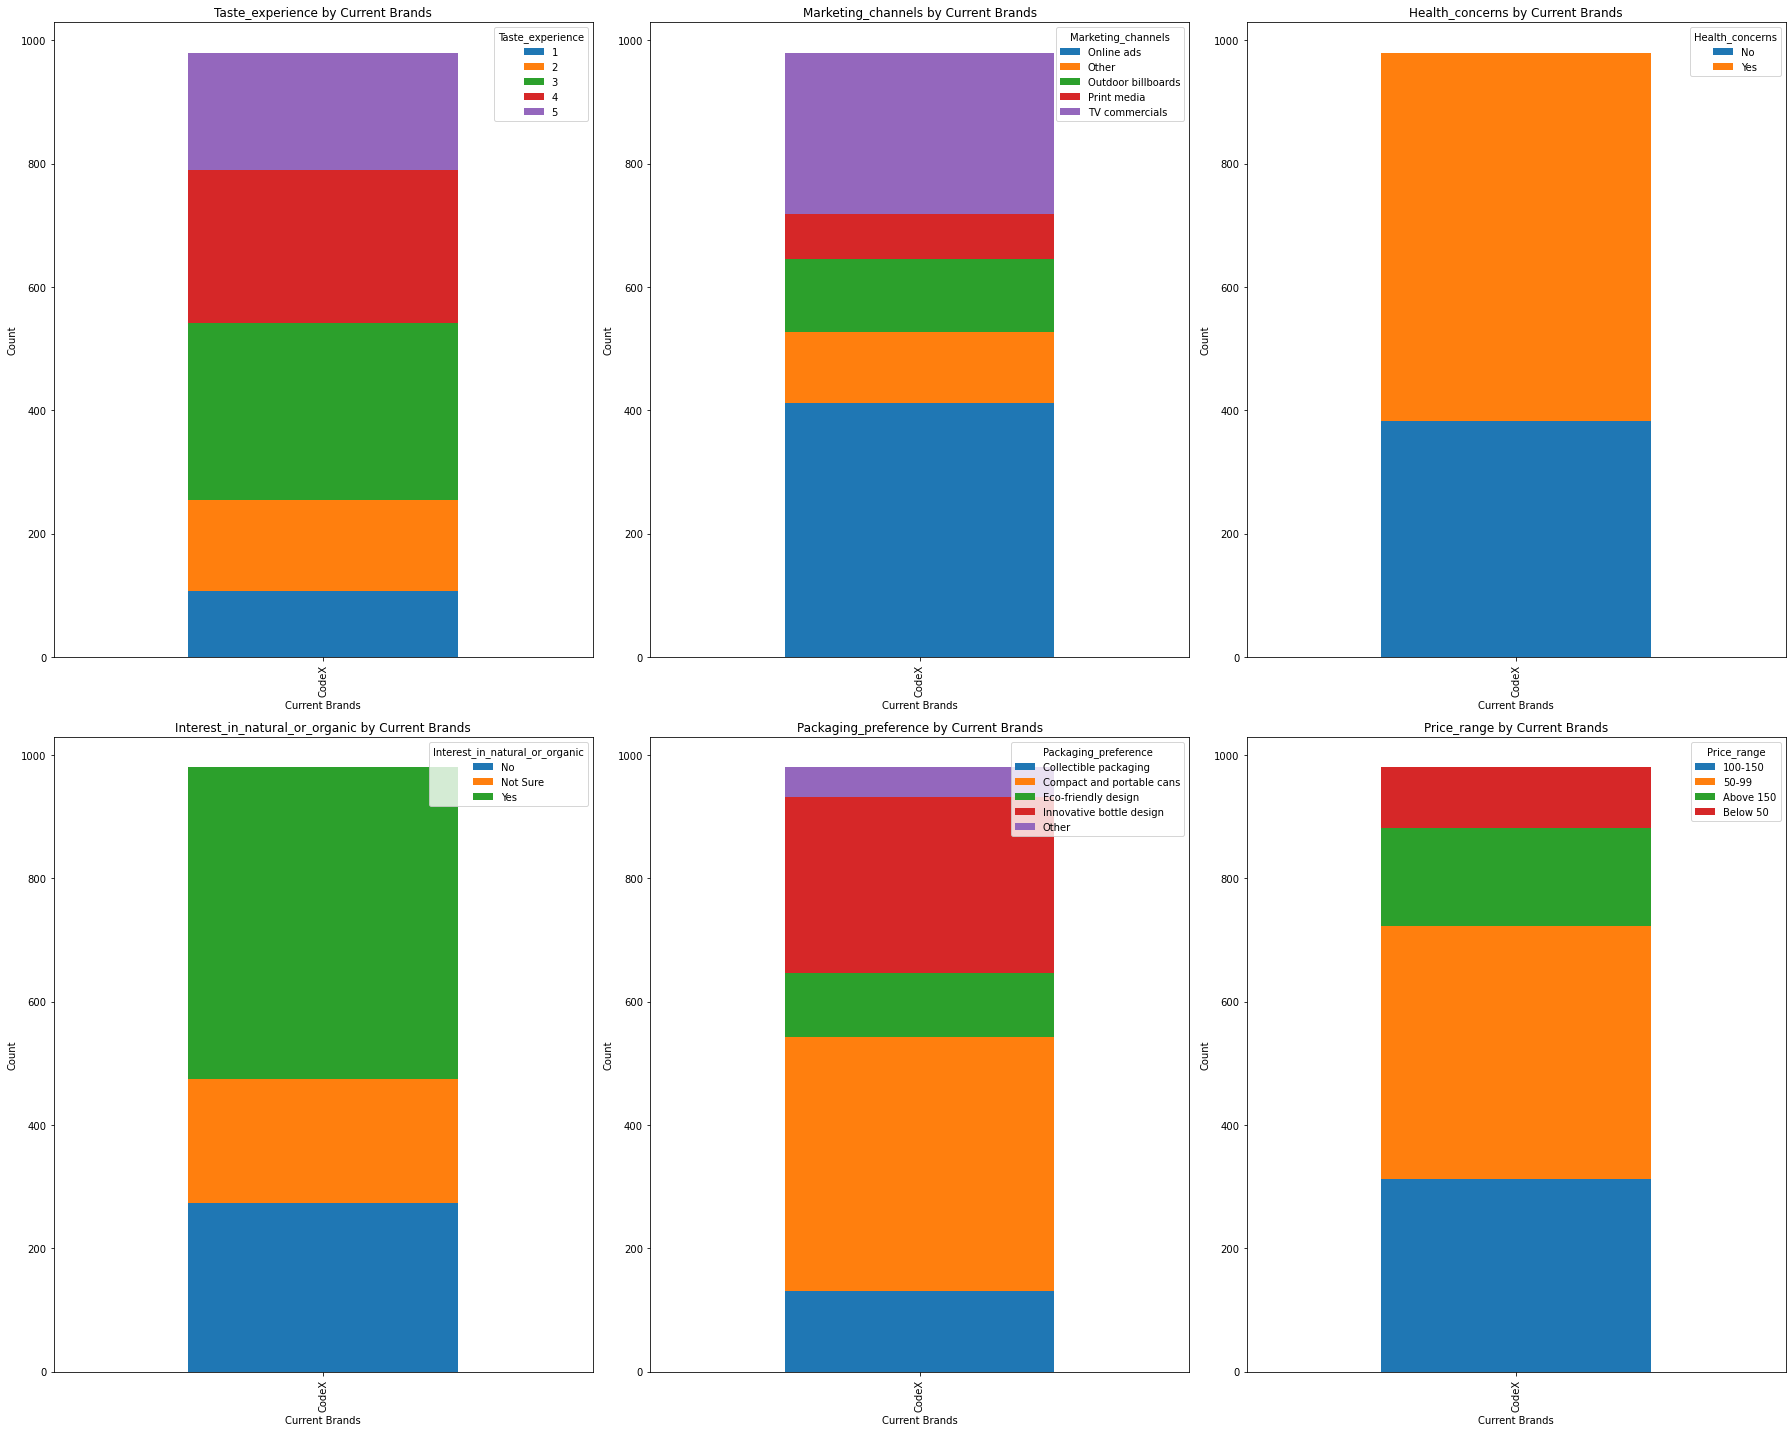

In [105]:
# Select the relevant columns for analysis
columns = ['Current_brands', 'Taste_experience', 'Marketing_channels', 'Health_concerns', 'Interest_in_natural_or_organic', 'Packaging_preference', 'Price_range']
data = df_CodeX[columns]

# Perform cross-tabulation between Current_brands and other columns
cross_tabs = []
for col in data.columns[1:]:
    cross_tab = pd.crosstab(data['Current_brands'], data[col])
    cross_tabs.append(cross_tab)

# Visualize the cross-tabulation using stacked bar plots
plt.figure(figsize=(25, 20))
for i, cross_tab in enumerate(cross_tabs):
    ax = plt.subplot(2, 3, i+1)
    cross_tab.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel('Current Brands')
    plt.ylabel('Count')
    plt.title(f'{data.columns[i+1]} by Current Brands')
    plt.legend(title=data.columns[i+1], loc='upper right')

plt.tight_layout()
plt.show()

In [108]:
Taste_experience_Count_Vs_Health = pd.crosstab(df_CodeX['Taste_experience'], df_CodeX['Health_concerns'])

# Print the table
Taste_experience_Count_Vs_Health

Health_concerns,No,Yes
Taste_experience,,
1,35,72
2,62,86
3,112,174
4,107,141
5,67,124


#### Here can be seen that if CodeX need to perform better in market then it has to be mordeate test ans well as healthy, then only brand will overcome with other brands

In [109]:
Taste_experience_Count_Vs_natural = pd.crosstab(df_CodeX['Taste_experience'], df_CodeX['Interest_in_natural_or_organic'])

# Print the table
Taste_experience_Count_Vs_natural

Interest_in_natural_or_organic,No,Not Sure,Yes
Taste_experience,,,
1,32,23,52
2,40,26,82
3,74,62,150
4,73,55,120
5,54,35,102


In [110]:
Packaging_preference_Count_Vs_Price = pd.crosstab(df_CodeX['Packaging_preference'], df_CodeX['Price_range'])

# Print the table
Packaging_preference_Count_Vs_Price

Price_range,100-150,50-99,Above 150,Below 50
Packaging_preference,,,,
Collectible packaging,37,55,25,13
Compact and portable cans,135,170,64,43
Eco-friendly design,33,54,13,5
Innovative bottle design,90,114,50,31
Other,18,17,7,6


#### here can be scene then Compact and portable cans are most popular among consumer and also with price range between 50 to 150

### 6. Purchase Behavior:
#### a. Where do respondents prefer to purchase energy drinks?
#### b. What are the typical consumption situations for energy drinks among respondents?
#### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

### a. Where do respondents prefer to purchase energy drinks?

In [112]:
df.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Tier_unit',
       'Tier_Name'],
      dtype='object')

In [113]:
df.Purchase_location.unique()

array(['Gyms and fitness centers', 'Supermarkets', 'Local stores',
       'Online retailers', 'Other'], dtype=object)

In [115]:
Purchase_location_Count_Vs_Current_brands = pd.crosstab(df['Purchase_location'], df['Current_brands'],margins=True, margins_name='Total')

# Print the table
Purchase_location_Count_Vs_Current_brands

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Purchase_location,,,,,,,,
Gyms and fitness centers,301,150,143,388,263,77,142,1464
Local stores,176,85,87,179,160,45,81,813
Online retailers,556,274,248,653,457,110,252,2550
Other,133,86,66,197,99,34,64,679
Supermarkets,946,463,436,1121,875,213,440,4494
Total,2112,1058,980,2538,1854,479,979,10000


### b. What are the typical consumption situations for energy drinks among respondents?

In [116]:
Typical_consumption_situations_Count_Vs_Current_brands = pd.crosstab(df['Typical_consumption_situations'], df['Current_brands'],margins=True, margins_name='Total')

# Print the table
Typical_consumption_situations_Count_Vs_Current_brands

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9,Total
Typical_consumption_situations,,,,,,,,
Driving/commuting,73,24,22,70,62,14,32,297
Other,92,49,60,123,90,25,52,491
Social outings/parties,332,167,128,372,277,79,132,1487
Sports/exercise,953,491,450,1127,822,216,435,4494
Studying/working late,662,327,320,846,603,145,328,3231
Total,2112,1058,980,2538,1854,479,979,10000


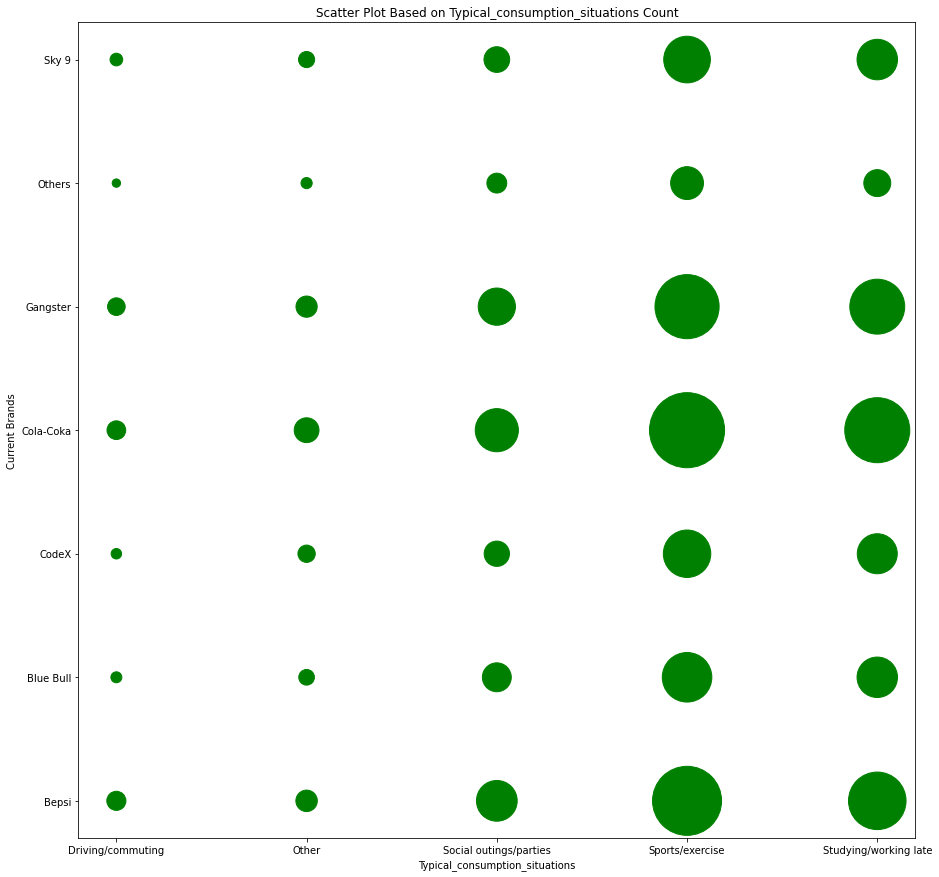

In [117]:
# Group by 'Current_brands' and 'Gender' and count the occurrences
grouped_df = df.groupby(['Typical_consumption_situations','Current_brands']).size().reset_index(name='Count')

# Increase the figure size
plt.figure(figsize=(15, 15))

# Create a scatter plot
plt.scatter(grouped_df['Typical_consumption_situations'], grouped_df['Current_brands'], s=grouped_df['Count']*5, color='green')

# Add labels and title
plt.xlabel('Typical_consumption_situations')
plt.ylabel('Current Brands')
plt.title('Scatter Plot Based on Typical_consumption_situations Count')

# Display the scatter plot
plt.show()


### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [119]:
# Select the relevant columns for the table
columns = ['Price_range', 'Limited_edition_packaging', 'Current_brands']
data = df[columns]

# Create the table
table = pd.pivot_table(data, index='Price_range', columns='Limited_edition_packaging', aggfunc='count', fill_value=0)

# Print the table
table


Current_brands               
Limited_edition_packaging             No Not Sure   Yes
Price_range                                            
100-150                             1244      635  1263
50-99                               1741      868  1679
Above 150                            639      322   600
Below 50                             399      206   404

In [124]:
# Select the relevant columns for the pivot table
columns = ['Price_range', 'Limited_edition_packaging', 'Current_brands']
data = df[columns]

# Create the pivot table
p_table = pd.pivot_table(data, index=['Price_range', 'Limited_edition_packaging'], columns='Current_brands', aggfunc='size', fill_value=0)



# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = p_table.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)


### 7. Product Development
#### a. Which area of business should we focus more on our product development? (Branding/taste/availability

In [125]:
df_CodeX.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'Tier_unit',
       'Tier_Name'],
      dtype='object')

In [126]:
# Select the relevant columns for the pivot table
columns = ['Taste_experience', 'Limited_edition_packaging', 'City']
data = df[columns]

# Create the pivot table
p_table = pd.pivot_table(data, index=['Taste_experience', 'Limited_edition_packaging'], columns='City', aggfunc='size', fill_value=0)



# Define a highlighting function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the maximum count in rows and columns
highlighted_table = p_table.style.apply(highlight_max, axis=0).apply(highlight_max, axis=1)

# Display the highlighted table
display(highlighted_table)